–û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏
–ú—ã –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ —Ç–µ–ª–µ—à–æ—É —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º TVMaze API –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ –∂–∞–Ω—Ä–∞—Ö, —Ä–µ–π—Ç–∏–Ω–≥–∞—Ö, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, —Å—Ç—Ä–∞–Ω—ã –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –∏ —Ç–¥. –ü—Ä–æ–µ–∫—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω –Ω–∞ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ä—ã–Ω–æ—á–Ω—ã—Ö –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–π, –≤—ã—è–≤–ª–µ–Ω–∏–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö (–∞–Ω–æ–º–∞–ª–∏–∏, –ø—Ä–æ–ø—É—Å–∫–∏).

In [2]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [4]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

–ü–æ–¥–∫–ª—é—á–∞–µ–º—Å—è –∫ API, –ø–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [6]:
def get_all_shows(max_pages=22, delay=1):
    """
    –°–æ–±–∏—Ä–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ —Å TVMaze API —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –ø–∞–≥–∏–Ω–∞—Ü–∏–∏
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    max_pages - –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–∞–Ω–∏—Ü –¥–ª—è —Å–±–æ—Ä–∞
    delay - –∑–∞–¥–µ—Ä–∂–∫–∞ –º–µ–∂–¥—É –∑–∞–ø—Ä–æ—Å–∞–º–∏ (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö)
    """
    all_shows = []
    page = 0
    
    while page < max_pages:
        try:
            # –û—Ç–ø—Ä–∞–≤–ª—è–µ–º –∑–∞–ø—Ä–æ—Å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –ø–∞–≥–∏–Ω–∞—Ü–∏–∏
            url = f"https://api.tvmaze.com/shows?page={page}"
            response = requests.get(url, timeout=10)
            
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å—Ç–∞—Ç—É—Å –æ—Ç–≤–µ—Ç–∞
            if response.status_code == 200:
                page_data = response.json()
                if not page_data:  # –ü—É—Å—Ç–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞ - –ø—Ä–µ–∫—Ä–∞—â–∞–µ–º —Å–±–æ—Ä
                    print(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –ø—É—Å—Ç–∞. –°–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∑–∞–≤–µ—Ä—à–µ–Ω.")
                    break
                    
                all_shows.extend(page_data)
                print(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: {len(all_shows)}")
                page += 1
                time.sleep(delay)
                
            elif response.status_code == 404:
                print(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –Ω–µ –Ω–∞–π–¥–µ–Ω–∞. –°–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∑–∞–≤–µ—Ä—à–µ–Ω.")
                break
                
            else:
                print(f"–û—à–∏–±–∫–∞ {response.status_code}. –ü–æ–≤—Ç–æ—Ä–Ω–∞—è –ø–æ–ø—ã—Ç–∫–∞...")
                time.sleep(5)
                
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞: {str(e)}")
            time.sleep(5)
            
    return all_shows

# –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ
shows_data = get_all_shows()

# –°–æ–∑–¥–∞–µ–º DataFrame
df = pd.DataFrame(shows_data)

# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–ª–æ–∂–µ–Ω–Ω—ã–µ –ø–æ–ª—è
def extract_nested(data, keys):
    """–ò–∑–≤–ª–µ–∫–∞–µ—Ç –≤–ª–æ–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Å–ª–æ–≤–∞—Ä—è"""
    if not isinstance(data, dict):
        return None
    for key in keys:
        data = data.get(key)
        if data is None:
            return None
    return data

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df.to_csv("tvmaze_full_dataset.csv", index=False)
print(f"\n–ò—Ç–æ–≥–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç: {df.shape[0]} —Å—Ç—Ä–æ–∫, {df.shape[1]} —Å—Ç–æ–ª–±—Ü–æ–≤")


–°—Ç—Ä–∞–Ω–∏—Ü–∞ 0 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 240
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 485
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 2 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 727
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 3 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 970
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 4 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 1208
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 5 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 1441
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 6 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 1675
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 7 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 1917
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 8 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 2149
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 9 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 2380
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 10 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 2609
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 11 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 2837
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 12 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –∑–∞–ø–∏—Å–µ–π: 3063
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 13 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ

In [7]:
df.head(10)

id                                                url                name  \
0   1      https://www.tvmaze.com/shows/1/under-the-dome      Under the Dome   
1   2  https://www.tvmaze.com/shows/2/person-of-interest  Person of Interest   
2   3              https://www.tvmaze.com/shows/3/bitten              Bitten   
3   4               https://www.tvmaze.com/shows/4/arrow               Arrow   
4   5      https://www.tvmaze.com/shows/5/true-detective      True Detective   
5   6             https://www.tvmaze.com/shows/6/the-100             The 100   
6   7            https://www.tvmaze.com/shows/7/homeland            Homeland   
7   8                https://www.tvmaze.com/shows/8/glee                Glee   
8   9             https://www.tvmaze.com/shows/9/revenge             Revenge   
9  10              https://www.tvmaze.com/shows/10/grimm               Grimm   

       type language                                genres   status  runtime  \
0  Scripted  English    [Drama, Science-Fiction, Thriller]    Ended     60.0   
1  Scripted  English      [Action, Crime, Science-Fiction]    Ended     60.0   
2  Scripted  English              [Drama, Horror, Romance]    Ended     60.0   
3  Scripted  English      [Drama, Action, Science-Fiction]    Ended     60.0   
4  Scripted  English              [Drama, Crime, Thriller]  Running     60.0   
5  Scripted  English  [Action, Adventure, Science-Fiction]    Ended     60.0   
6  Scripted  English          [Drama, Thriller, Espionage]    Ended     60.0   
7  Scripted  English               [Drama, Music, Romance]    Ended     60.0   
8  Scripted  English            [Drama, Thriller, Mystery]    Ended     60.0   
9  Scripted  English          [Drama, Crime, Supernatural]    Ended     60.0   

   averageRuntime   premiered  ...            rating weight  \
0            60.0  2013-06-24  ...  {'average': 6.5}     99   
1            60.0  2011-09-22  ...  {'average': 8.8}     99   
2            60.0  2014-01-11  ...  {'average': 7.5}     95   
3            60.0  2012-10-10  ...  {'average': 7.4}     98   
4            63.0  2014-01-12  ...  {'average': 8.1}     99   
5            60.0  2014-03-19  ...  {'average': 7.7}     98   
6            60.0  2011-10-02  ...  {'average': 8.2}     94   
7            60.0  2009-05-19  ...  {'average': 6.6}     95   
8            60.0  2011-09-21  ...  {'average': 7.7}     94   
9            60.0  2011-10-28  ...  {'average': 8.4}     98   

                                             network webChannel  dvdCountry  \
0  {'id': 2, 'name': 'CBS', 'country': {'name': '...       None        None   
1  {'id': 2, 'name': 'CBS', 'country': {'name': '...       None        None   
2  {'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...       None        None   
3  {'id': 5, 'name': 'The CW', 'country': {'name'...       None        None   
4  {'id': 8, 'name': 'HBO', 'country': {'name': '...       None        None   
5  {'id': 5, 'name': 'The CW', 'country': {'name'...       None        None   
6  {'id': 9, 'name': 'Paramount+ with Showtime', ...       None        None   
7  {'id': 4, 'name': 'FOX', 'country': {'name': '...       None        None   
8  {'id': 3, 'name': 'ABC', 'country': {'name': '...       None        None   
9  {'id': 1, 'name': 'NBC', 'country': {'name': '...       None        None   

                                           externals  \
0  {'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...   
1  {'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...   
2  {'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...   
3  {'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...   
4  {'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...   
5  {'tvrage': 34770, 'thetvdb': 268592, 'imdb': '...   
6  {'tvrage': 27811, 'thetvdb': 247897, 'imdb': '...   
7  {'tvrage': 21704, 'thetvdb': 83610, 'imdb': 't...   
8  {'tvrage': 28387, 'thetvdb': 248837, 'imdb': '...   
9  {'tvrage': 28352, 'thetvdb': 248736, 'imdb': '...   

                                               image  \
0  {

–°–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –∏—Ö –¥–æ–ª—é

In [9]:
df.isna().sum()

id                   0
url                  0
name                 0
type                 0
language             1
genres               0
status               0
runtime            206
averageRuntime      37
premiered           14
ended              509
officialSite      2204
schedule             0
rating               0
weight               0
network            213
webChannel        4935
dvdCountry        5183
externals            0
image               25
summary             47
updated              0
_links               0
dtype: int64

In [10]:
df.isna().mean()

id                0.000000
url               0.000000
name              0.000000
type              0.000000
language          0.000193
genres            0.000000
status            0.000000
runtime           0.039707
averageRuntime    0.007132
premiered         0.002699
ended             0.098111
officialSite      0.424827
schedule          0.000000
rating            0.000000
weight            0.000000
network           0.041056
webChannel        0.951234
dvdCountry        0.999036
externals         0.000000
image             0.004819
summary           0.009059
updated           0.000000
_links            0.000000
dtype: float64

–ß–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ, –µ—Å–ª–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö –±–æ–ª—å—à–µ 30% nan, —Ç–æ —É–¥–∞–ª—è–µ–º –≤—Å—é –∫–æ–ª–æ–Ω–∫—É, –µ—Å–ª–∏ –º–µ–Ω—å—à–µ, —Ç–æ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å nan

In [12]:
cols_to_drop = df.columns[df.isna().mean() > 0.3]
df_clean = df.drop(cols_to_drop, axis=1)
df_clean = df_clean.dropna(axis=0, how="any")

In [13]:
df = df_clean

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ —á–∏—Å—Ç–∫–∏

In [15]:
df.shape

(4400, 20)

–í—ã–≤–µ–¥–µ–º —Ç–µ —à–æ—É, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–µ—Ä–∏–∏ –≤—ã—à–µ —Å—Ä–µ–¥–Ω–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π

In [17]:
Q1 = df['averageRuntime'].quantile(0.25)
Q3 = df['averageRuntime'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['averageRuntime'] < (Q1 - 1.5 * IQR)) | 
    (df['averageRuntime'] > (Q3 + 1.5 * IQR))
]

print("–ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:")
print(outliers[['name', 'averageRuntime']])  

–ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏:
                                   name  averageRuntime
451                             Columbo           108.0
597                     Sons of Liberty           120.0
617                           Ascension           120.0
620   Sacred Journeys with Bruce Feiler           120.0
630                        The Red Tent           120.0
...                                 ...             ...
3881                            McCloud           110.0
3919  1066: The Battle for Middle Earth           115.0
4360   Squadra Antimafia - Palermo Oggi           110.0
4919                   X-Factor Ukraine           120.0
4963                   The Last Templar           120.0

[62 rows x 2 columns]


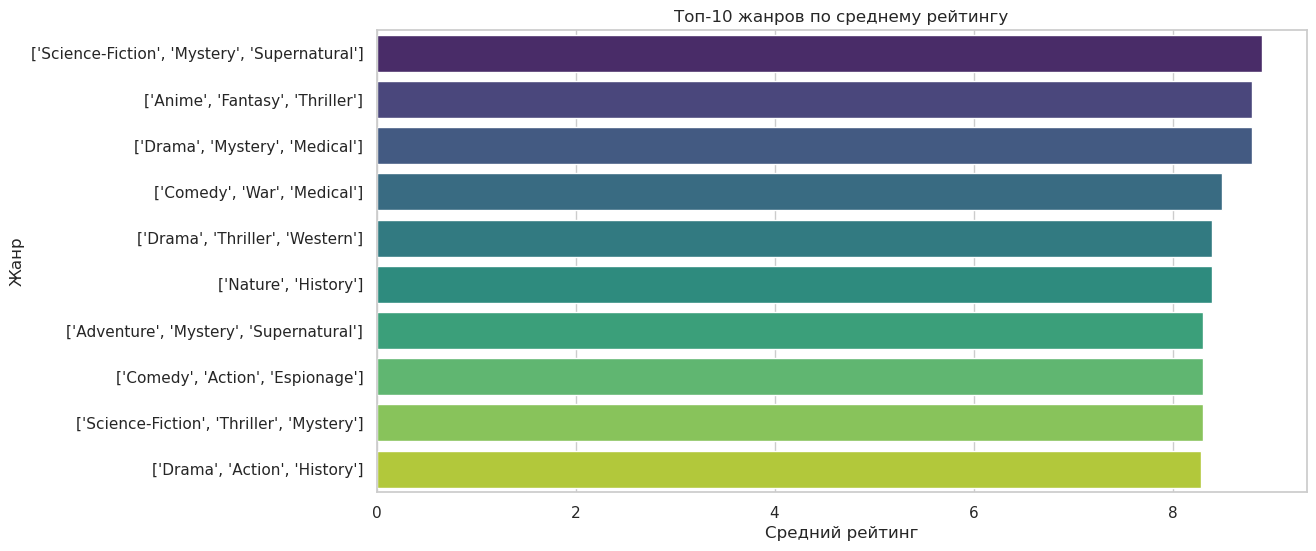

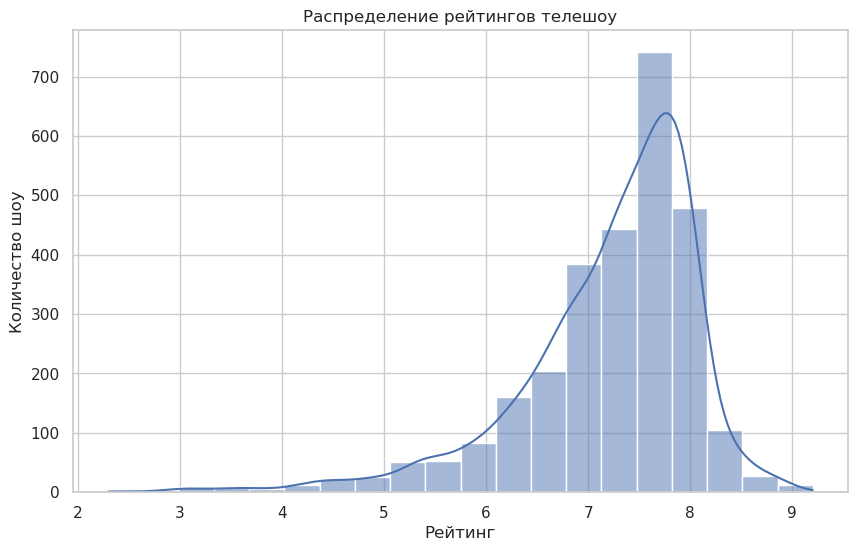

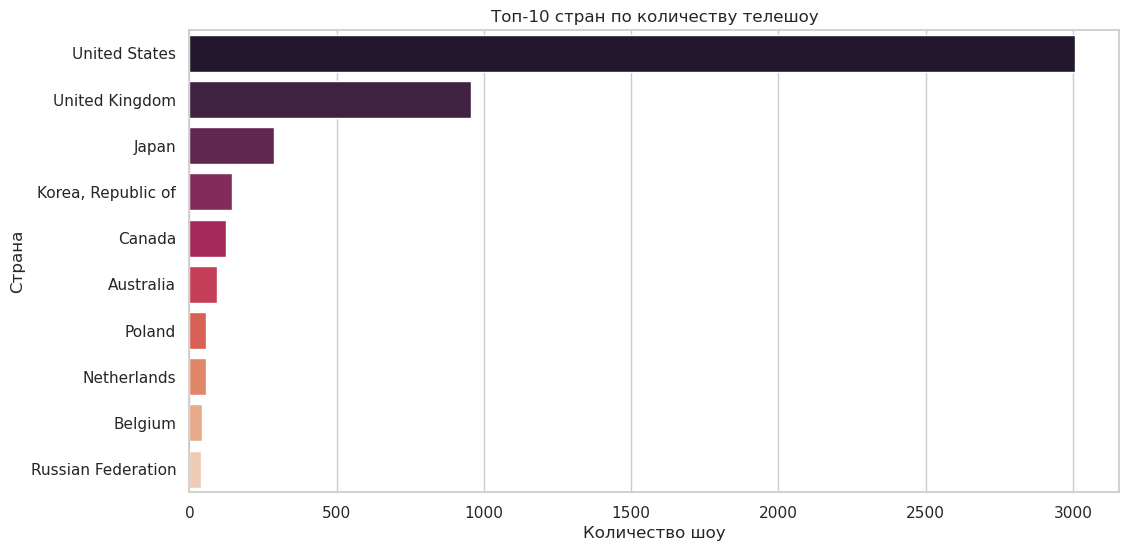

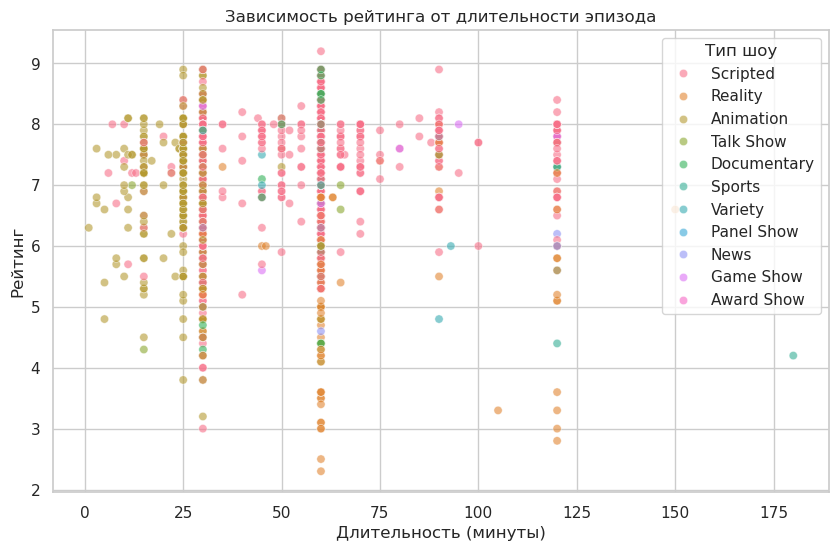

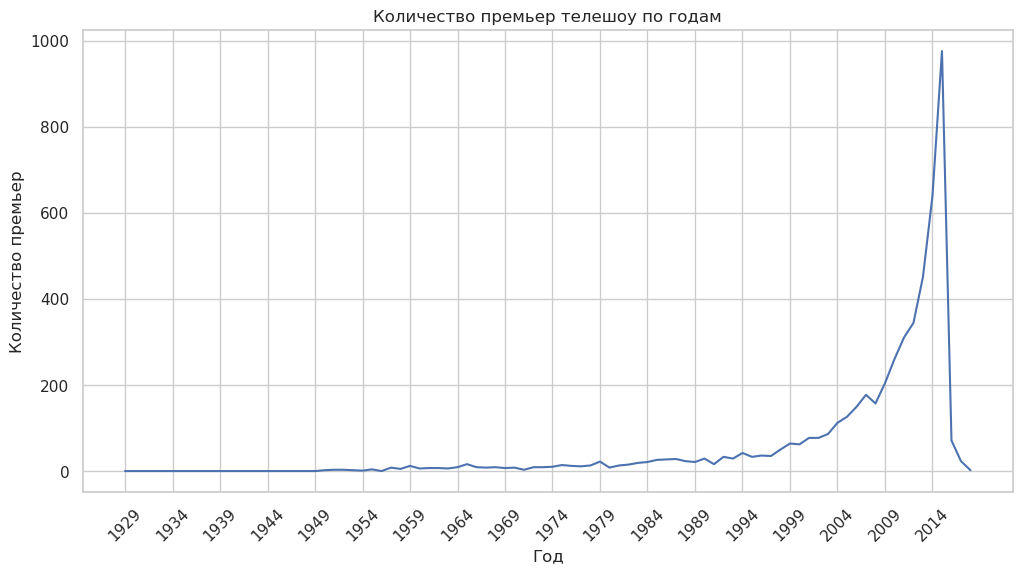

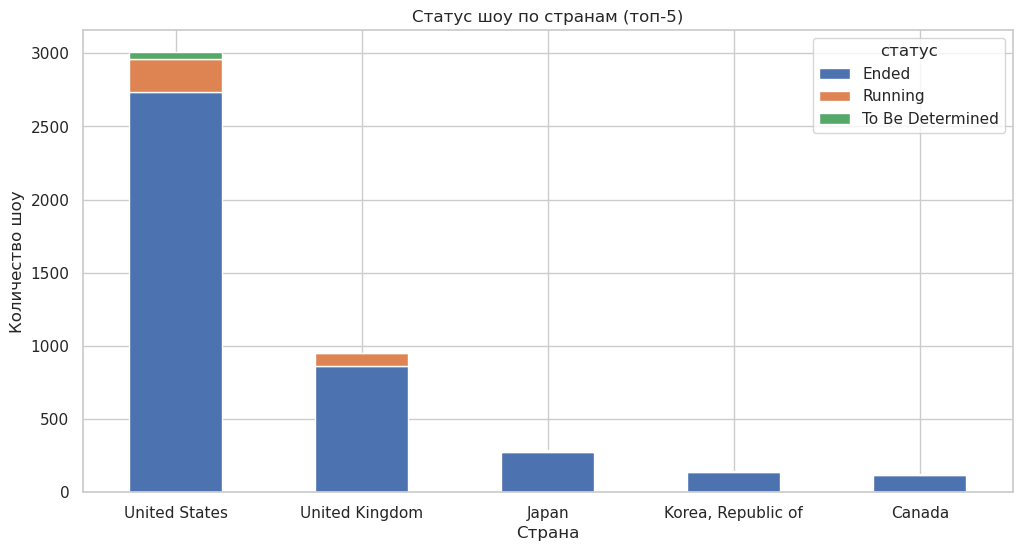

In [18]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª–µ–π –≥—Ä–∞—Ñ–∏–∫–æ–≤
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'  # –î–ª—è –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –∫–∏—Ä–∏–ª–ª–∏—Ü—ã


df = pd.read_csv("tvmaze_dataset_rus.csv")

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç
df['–¥–∞—Ç–∞_–ø—Ä–µ–º—å–µ—Ä—ã'] = pd.to_datetime(df['–¥–∞—Ç–∞_–ø—Ä–µ–º—å–µ—Ä—ã'], errors='coerce')
df['–≥–æ–¥_–ø—Ä–µ–º—å–µ—Ä—ã'] = df['–¥–∞—Ç–∞_–ø—Ä–µ–º—å–µ—Ä—ã'].dt.year

# 1 –≥—Ä–∞—Ñ–∏–∫ - - –ê–Ω–∞–ª–∏–∑ –∂–∞–Ω—Ä–æ–≤ –∏ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
plt.figure(figsize=(12, 6))
top_genres = df.groupby('–∂–∞–Ω—Ä—ã')['—Å—Ä–µ–¥–Ω–∏–π_—Ä–µ–π—Ç–∏–Ω–≥'].mean().nlargest(10)  # –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–æ genres_df ‚Üí df
sns.barplot(
    x=top_genres.values, 
    y=top_genres.index, 
    hue=top_genres.index,  
    palette="viridis", 
    legend=False
)
plt.title('–¢–æ–ø-10 –∂–∞–Ω—Ä–æ–≤ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É —Ä–µ–π—Ç–∏–Ω–≥—É')
plt.xlabel('–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥')
plt.ylabel('–ñ–∞–Ω—Ä')
plt.show()

# 2 –≥—Ä–∞—Ñ–∏–∫ - –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
plt.figure(figsize=(10, 6))
sns.histplot(df['—Å—Ä–µ–¥–Ω–∏–π_—Ä–µ–π—Ç–∏–Ω–≥'].dropna(), bins=20, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ —Ç–µ–ª–µ—à–æ—É')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–æ—É')
plt.show()

# 3 –≥—Ä–∞—Ñ–∏–∫ - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–æ—É –ø–æ —Å—Ç—Ä–∞–Ω–∞–º
plt.figure(figsize=(12, 6))
top_countries = df['—Å—Ç—Ä–∞–Ω–∞'].value_counts().head(10)
sns.barplot(
    x=top_countries.values, 
    y=top_countries.index, 
    hue=top_countries.index,  # –î–æ–±–∞–≤–ª–µ–Ω–æ —è–≤–Ω–æ–µ —É–∫–∞–∑–∞–Ω–∏–µ hue
    palette="rocket", 
    legend=False  # –û—Ç–∫–ª—é—á–∞–µ–º –ª–µ–≥–µ–Ω–¥—É
)
plt.title('–¢–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç–µ–ª–µ—à–æ—É')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–æ—É')
plt.ylabel('–°—Ç—Ä–∞–Ω–∞')
plt.show()

# 4 –≥—Ä–∞—Ñ–∏–∫ - –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
plt.figure(figsize=(10, 6))
sns.scatterplot(x='–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å_–º–∏–Ω—É—Ç—ã', y='—Å—Ä–µ–¥–Ω–∏–π_—Ä–µ–π—Ç–∏–Ω–≥', 
                data=df, alpha=0.6, hue='—Ç–∏–ø')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —ç–ø–∏–∑–æ–¥–∞')
plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (–º–∏–Ω—É—Ç—ã)')
plt.ylabel('–†–µ–π—Ç–∏–Ω–≥')
plt.legend(title='–¢–∏–ø —à–æ—É')
plt.show()

# 5 –≥—Ä–∞—Ñ–∏–∫ - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–º—å–µ—Ä –ø–æ –≥–æ–¥–∞–º
plt.figure(figsize=(12, 6))
premieres_by_year = df['–≥–æ–¥_–ø—Ä–µ–º—å–µ—Ä—ã'].value_counts().sort_index()
sns.lineplot(x=premieres_by_year.index, y=premieres_by_year.values)
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–º—å–µ—Ä —Ç–µ–ª–µ—à–æ—É –ø–æ –≥–æ–¥–∞–º')
plt.xlabel('–ì–æ–¥')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–º—å–µ—Ä')
plt.xticks([i for i in range(int(premieres_by_year.index.min()), int(premieres_by_year.index.max()), 5)], rotation=45)
plt.show()

# 6 –≥—Ä–∞—Ñ–∏–∫ - –°—Ç–∞—Ç—É—Å —à–æ—É –ø–æ —Å—Ç—Ä–∞–Ω–∞–º (—Ç–æ–ø-5)
top5_countries = df['—Å—Ç—Ä–∞–Ω–∞'].value_counts().head(5).index
status_by_country = pd.crosstab(df['—Å—Ç—Ä–∞–Ω–∞'], df['—Å—Ç–∞—Ç—É—Å']).loc[top5_countries]

status_by_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('–°—Ç–∞—Ç—É—Å —à–æ—É –ø–æ —Å—Ç—Ä–∞–Ω–∞–º (—Ç–æ–ø-5)')
plt.xlabel('–°—Ç—Ä–∞–Ω–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–æ—É')
plt.xticks(rotation=0)
plt.show()

–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 1. –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –ª–∏–¥–∏—Ä—É—é—Ç –∂–∞–Ω—Ä—ã –¥—Ä–∞–º–∞ - —Ç—Ä–∏–ª–ª–µ—Ä, –Ω–∞—É–Ω–∞—è —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞ –∏ –∫—Ä–∏–º–∏–Ω–∞–ª, –≤–µ—Ä–æ—è—Ç–Ω–æ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –ª—é–¥–µ–π —É–≤–ª–µ–∫–∞—é—Ç —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ-–Ω–∞—Å—ã—â–µ–Ω–Ω—ã–µ —Å—é–∂–µ—Ç—ã
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 2. –ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è —Ä–µ–π—Ç–∏–Ω–≥ - 7-8. –í–æ–∑–º–æ–∂–Ω–æ —Ç–∞–∫–∞—è –≤—ã—Å–æ–∫–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø—É–±–ª–∏–∫—É–µ—Ç –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –∫–æ–Ω—Ç–µ–Ω—Ç, –æ—Ç—Å–µ–∏–≤–∞—è –Ω–∏–∑–∫–æ—Ä–µ–π—Ç–∏–Ω–≥–æ–≤—ã–µ —à–æ—É
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 3. –°–®–ê –∑–∞–Ω–∏–º–∞–µ—Ç –¥–æ–º–∏–Ω–∏—Ä—É—é—â—É—é –ø–æ–∑–∏—Ü–∏—é –≤ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç–≤ —à–æ—É
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 4. –ù–µ–ª—å–∑—è –≤—ã—è–≤–∏—Ç—å —á–µ—Ç–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —à–æ—É –∏ —Ä–µ–π—Ç–∏–Ω–≥–æ–º
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 5. –û—Ç–º–µ—á–∞–µ–º —Ä–æ—Å—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —à–æ—É –ø–æ—Å–ª–µ 2010 –≥–æ–¥–∞, –≤–∏–¥–∏–º —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –∫ —É–º–µ–Ω—å—à–µ–Ω–∏—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ 
–ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ 6. –í—ã—Å–æ–∫–∞—è –¥–æ–ª—è –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö —à–æ—É –≤ –°–®–ê –∏ –ö–∞–Ω–∞–¥–µ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã–±–æ—Ä–∫–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–æ–π, —Ç–∞–∫ –∫–∞–∫ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ —Å–∫–ª–æ–Ω–Ω–∞ –æ–ø—É–±–ª–∏–∫–æ–≤—ã–≤–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ —à–æ—É, —Å–Ω—è—Ç—ã—Ö –¥–ª—è –∞–Ω–≥–ª–æ—è–∑—ã—á–Ω–æ–π –ø—É–±–ª–∏–∫–∏

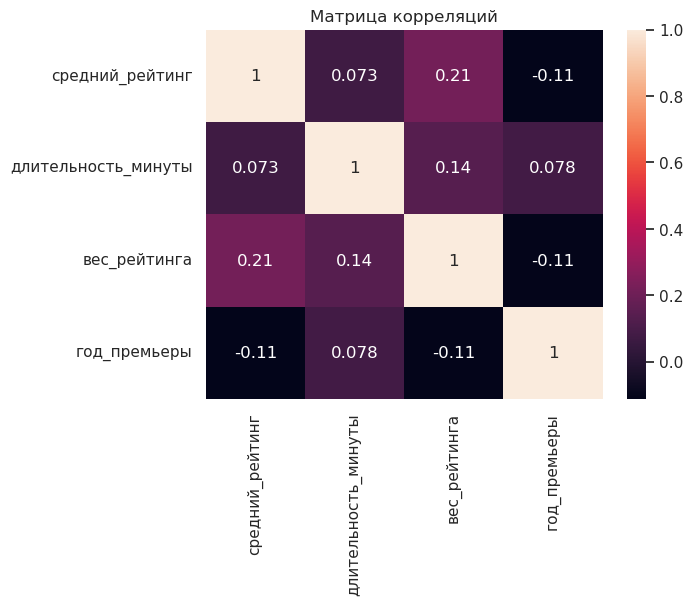

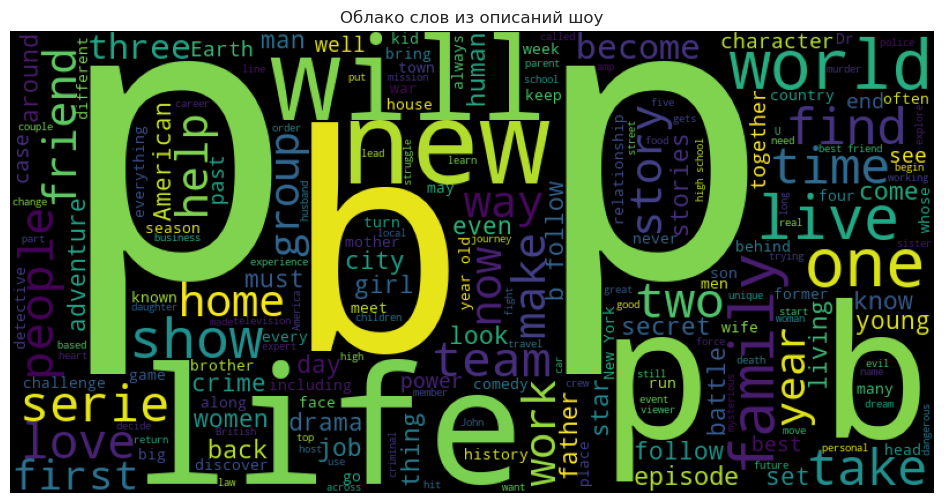

In [20]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
corr_matrix = df[['—Å—Ä–µ–¥–Ω–∏–π_—Ä–µ–π—Ç–∏–Ω–≥', '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å_–º–∏–Ω—É—Ç—ã', '–≤–µ—Å_—Ä–µ–π—Ç–∏–Ω–≥–∞', '–≥–æ–¥_–ø—Ä–µ–º—å–µ—Ä—ã']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π')
plt.show()
print()

text = ' '.join(df['–æ–ø–∏—Å–∞–Ω–∏–µ'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –∏–∑ –æ–ø–∏—Å–∞–Ω–∏–π —à–æ—É')
plt.show()

–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ–º—ã–µ —Å–ª–æ–≤–∞ –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö —à–æ—É

–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º —á–∞—Ç –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ —Å –æ–±—Å—É–∂–¥–µ–Ω–∏—è–º–∏ —Ñ–∏–ª—å–º–æ–≤ –∏ —à–æ—É

In [23]:
import json 

file_path = r"C:\Users\sharo\Downloads\Telegram Desktop\ChatExport_2025-03-24\result.json"

In [24]:
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [25]:
data["messages"][3]["text"]

'‚ö°Ô∏è–ë—É–∫–∏–Ω—ã –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è!\n\n–¢–ù–¢ –∏ –∫–∏–Ω–æ–∫–æ–º–ø–∞–Ω–∏—è –±—Ä–∞—Ç—å–µ–≤ –ê–Ω–¥—Ä–µ–∞—Å—è–Ω —Å–Ω–∏–º—É—Ç –Ω–æ–≤—ã–π —Å–µ—Ä–∏–∞–ª ¬´–ë—É–∫–∏–Ω—ã¬ª. –ö —Å–≤–æ–∏–º —Ä–æ–ª—è–º –≤–µ—Ä–Ω—É—Ç—Å—è –í–∏–∫—Ç–æ—Ä –õ–æ–≥–∏–Ω–æ–≤, –ù–∞—Ç–∞–ª—å—è –ë–æ—á–∫–∞—Ä–µ–≤–∞, –î–∞—Ä—å—è –°–∞–≥–∞–ª–æ–≤–∞ –∏ –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –Ø–∫–∏–Ω. –í—Å–µ–≥–æ –±—É–¥–µ—Ç 10 —Å–µ—Ä–∏–π.'

In [26]:
text = [None for i in range(len(data["messages"]))]
for i, el in enumerate(data["messages"]):
    arr = []
    if isinstance(el["text"], str):
        arr = [el["text"]]
    else:
        for mes in el["text"]:
            if isinstance(mes, str):
                arr.append(mes)
            if isinstance(mes, dict) and mes["type"] == "bold":
                arr.append(mes["text"])

    text[i] = arr


text = [el for el in text if len(el) != 1 and el[0] != ""]
text[:5]

[['–õ–∏–Ω–¥—Å–∏ –õ–æ—Ö–∞–Ω –≤–ø–µ—Ä–≤—ã–µ —Å—Ç–∞–ª–∞ –º–∞–º–æ–π\n\n',
  'Page Six —Å–æ–æ–±—â–∞–µ—Ç, —á—Ç–æ —É –Ω–∏—Ö —Å –ë–∞–¥–µ—Ä–æ–º –®–∞–º–º–∞—Å–æ–º —Ä–æ–¥–∏–ª—Å—è —Å—ã–Ω, –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞–∑–≤–∞–ª–∏ –õ—É–∞–π'],
 ['–í–æ–¥–æ–Ω–∞–µ–≤–∞ —Å —Å—ã–Ω–æ–º. ', '\n\n–ö–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —ç—Ç–æ—Ç –ø–∑–¥—Ü —Å–∞–º–∏ ü§¶\u200d‚ôÇÔ∏è'],
 ['–£–º–µ—Ä –∞–∫—Ç—ë—Ä –ê–Ω–≥—É—Å –ö–ª–∞—É–¥, –∫–æ—Ç–æ—Ä—ã–π —Å—ã–≥—Ä–∞–ª –æ–¥–Ω—É –∏–∑ –≥–ª–∞–≤–Ω—ã—Ö —Ä–æ–ª–µ–π –≤ —Å–µ—Ä–∏–∞–ª–µ ¬´–≠–π—Ñ–æ—Ä–∏—è¬ª. \n\n',
  '–ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ, –∏–∑-–∑–∞ –ø–µ—Ä–µ–¥–æ–∑–∞ –∞–Ω—Ç–∏–¥–µ–ø—Ä–µ—Å—Å–∞–Ω—Ç–∞–º–∏. –ü–æ —Å–ª–æ–≤–∞–º —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤, –æ–Ω —Å—Ç—Ä–∞–¥–∞–ª –æ—Ç –¥–µ–ø—Ä–µ—Å—Å–∏–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç. \n\n–ù–µ–¥–µ–ª—é –Ω–∞–∑–∞–¥ —É–º–µ—Ä –µ–≥–æ –æ—Ç–µ—Ü –∏ —ç—Ç–æ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ –ø–æ–¥–∫–æ—Å–∏–ª–æ 25-–ª–µ—Ç–Ω–µ–≥–æ –∞—Ä—Ç–∏—Å—Ç–∞. –ö–ª–∞—É–¥ –≤—Å—è—á–µ—Å–∫–∏ –ø—ã—Ç–∞–ª—Å—è —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ–º. –ù–∞ —Å–µ–¥—å–º–æ–π –¥–µ–Ω—å –ø–æ—Å–ª

In [27]:
text = [[mes.strip().lower().replace("\n", " ") for mes in el if mes != "" and len(mes) > 2] for el in text]
text[:5]

[['–ª–∏–Ω–¥—Å–∏ –ª–æ—Ö–∞–Ω –≤–ø–µ—Ä–≤—ã–µ —Å—Ç–∞–ª–∞ –º–∞–º–æ–π',
  'page six —Å–æ–æ–±—â–∞–µ—Ç, —á—Ç–æ —É –Ω–∏—Ö —Å –±–∞–¥–µ—Ä–æ–º —à–∞–º–º–∞—Å–æ–º —Ä–æ–¥–∏–ª—Å—è —Å—ã–Ω, –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞–∑–≤–∞–ª–∏ –ª—É–∞–π'],
 ['–≤–æ–¥–æ–Ω–∞–µ–≤–∞ —Å —Å—ã–Ω–æ–º.', '–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —ç—Ç–æ—Ç –ø–∑–¥—Ü —Å–∞–º–∏ ü§¶\u200d‚ôÇÔ∏è'],
 ['—É–º–µ—Ä –∞–∫—Ç—ë—Ä –∞–Ω–≥—É—Å –∫–ª–∞—É–¥, –∫–æ—Ç–æ—Ä—ã–π —Å—ã–≥—Ä–∞–ª –æ–¥–Ω—É –∏–∑ –≥–ª–∞–≤–Ω—ã—Ö —Ä–æ–ª–µ–π –≤ —Å–µ—Ä–∏–∞–ª–µ ¬´—ç–π—Ñ–æ—Ä–∏—è¬ª.',
  '–ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ, –∏–∑-–∑–∞ –ø–µ—Ä–µ–¥–æ–∑–∞ –∞–Ω—Ç–∏–¥–µ–ø—Ä–µ—Å—Å–∞–Ω—Ç–∞–º–∏. –ø–æ —Å–ª–æ–≤–∞–º —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤, –æ–Ω —Å—Ç—Ä–∞–¥–∞–ª –æ—Ç –¥–µ–ø—Ä–µ—Å—Å–∏–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç.   –Ω–µ–¥–µ–ª—é –Ω–∞–∑–∞–¥ —É–º–µ—Ä –µ–≥–æ –æ—Ç–µ—Ü –∏ —ç—Ç–æ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–æ –ø–æ–¥–∫–æ—Å–∏–ª–æ 25-–ª–µ—Ç–Ω–µ–≥–æ –∞—Ä—Ç–∏—Å—Ç–∞. –∫–ª–∞—É–¥ –≤—Å—è—á–µ—Å–∫–∏ –ø—ã—Ç–∞–ª—Å—è —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ–º. –Ω–∞ —Å–µ–¥—å–º–æ–π –¥–µ–Ω—å –ø–æ—Å–ª–µ –ø–æ—Ö–æ—Ä–æ–

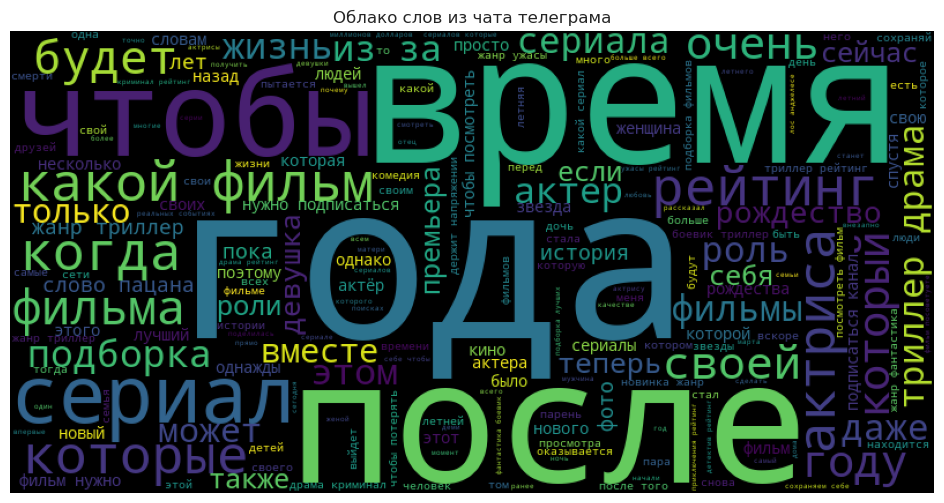

In [28]:
text2 = ' '.join([" ".join([word for mes in el for word in mes.split() if len(word) > 3]) for el in text])
wordcloud = WordCloud(width=800, height=400).generate(text2)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –∏–∑ —á–∞—Ç–∞ —Ç–µ–ª–µ–≥—Ä–∞–º–∞')
plt.show()